<a href="https://colab.research.google.com/github/Vaish-mambady/Weather-Prediction/blob/main/Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Recurrent Neural Networks

## Learning Objectives
At the end of the experiment, you will be able to

* know sequence modeling
* understand cell structure of basic RNN, LSTM, and GRU
* implement RNNs in sequence modeling problem
* apply LSTMs and GRUs to solve real world problems

### Introduction
### Sequence Modelling:

Say, we are going to develop a language model having a vocabulary of 1000 words. The ith training example being-" A quick brown fox jumps over the lazy dog".

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/Temporal_Sequence.PNG)


Here, each word is a sequence one after another and we, call it temporal sequences (**time steps**).

**Notation:**

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/Notation1.PNG)



* Since the vocabulary is 1000 words, each sequence of each training example can be one-hot encoded into a 1D vector of size 1000 i.e. number of units in a single training example also known as **feature**.
* For one training example with 9 temporal sequences the shape of the input:(1000,9).
* For say, 10 such examples (**batch size** =10), we have to create a 3D tensor having the shape of (10,1000,9).

**Notation:**

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/Tensor_shape_3D.PNG)


We can take a 2D slice of the above 3D tensor for each time step and pass them as **input** having shape of (m,nx) for the corresponding time sequence/step in RNN model.

* Note: The 3D tensor can also be arranged like:**[batch, timesteps, feature]**.

### Recurrent Neural Networks (RNN)
RNNs are the state of the art algorithm, perfectly suited for machine learning problems that involve sequential data.They have "memory" and can read inputs $x_{t}$ (such as words) one at a time, and remember some information/context through the hidden layer activations that get passed from one time step to the next.
### Cell of a basic RNN (One Neuron of RNN)
Given below is a self explanatory schematic diagram of a cell used in basic RNN.

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/Basic_Rnn_Cell.PNG)

$\text{Figure: Basic RNN Cell}$

Basic RNN cell takes  $x_{(t)}$ (current input) and $y_{(t-1)}$ (cell output containing information from the past) as input, and outputs $y_{(t)}$ which is given to the next RNN cell and also used to predict the output.
$W_{y}, W_{x},b $ are weights and bias.

**Equations for  Implementing the RNN-cell are described in Figure above**.


1. Compute the hidden state with tanh activation: $y_{t} = \phi(x_{t}W_{x}+y_{(t-1)}W_{y} + b)$.
2.Activation function, $\phi=\tanh$, is preferred.
**Dimensions**

While implementing these equations dimensions of the matrices should be taken care of.

- Interesting to note, each of these weights matrics (parameters) can be thought of as an internal one-layer neural network with output size as defined in parameter units(neurons). See the diagram of RNN cell above and think about it.

- $Y_{(t)}$ is an $ m\times n_{neurons} $ matrix containing the layer’s outputs at time step t for each
instance(training example) in the mini-batch ($m$ is the number of instances in the mini-batch and $n_{neurons}$ is the number of neurons).

- $X_{(t)}$ is an $ m\times n_{inputs} $ matrix containing the inputs for all instances ( $ n_{inputs}$ is the number of input features).
- $W_x$ is an $n_{inputs}\times n_{neurons}$ matrix containing the connection weights for the inputs
of the current time step.
- $W_{(y)}$  is an $n_{neurons}\times n_{neurons}$ matrix containing the connection weights for the out‐
puts of the previous time step.
- b is a vector of size $n_{neurons}$ containing each neuron’s bias term.


- See the diagram below with equations and  shape of weights and bias according to the given input shape and output shape for any one-time step. We can see how the shape of weights influences the shape of the output.




![Img](https://cdn.iisc.talentsprint.com/CDS/Images/Shapes_of_different_Weights.PNG)

$\text{Figure: Dimensions of weights, bias, given input and output}$

#### Importing Required Packages

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

###Implementing Basic RNN Cell

In [ ]:
# Initializing Parameter
tf.random.set_seed(0)
n_inputs = 3     # Number of Feature in each time sequence
n_neurons = 5    # Number of Neurons
m =4             # Batch size

Xt = tf.Variable(tf.random.normal(shape=[m,n_inputs],dtype=tf.float32)) # Input Sequence X(t), taken random values
Yt_m =tf.Variable(tf.zeros([m, n_neurons], dtype=tf.float32))           # Output from previous cell y(t-1), Initially taken zero
# Weights are initialized randomly
Wx = tf.Variable(tf.random.normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random.normal(shape=[n_neurons,n_neurons],dtype=tf.float32)) #
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))
# Implementing the Basic Rnn Cell Equation:
Yt = tf.tanh(tf.matmul(Xt, Wx) +tf.matmul(Yt_m, Wy)+ b)  # y(t)
print(Yt)
# This Yt is taken as output and  fed into next cell as well

tf.Tensor(
[[ 0.8808694  -0.42193308  0.8394809  -0.42464516 -0.4153317 ]
 [-0.14246958  0.97655916 -0.9971208  -0.04416523  0.79646397]
 [-0.8697957  -0.99038297  0.6455641   0.9797366  -0.8895939 ]
 [ 0.8956613   0.93809664 -0.50919133 -0.9001034   0.65119475]], shape=(4, 5), dtype=float32)


#### Defining a function: **Rnn_Cell**
* Using the above calculation we are going to define a function that returns the next activation state (a_next) and prediction of the current cell (yt_pred) taking xt, a_prev, and parameters (a dictionary) as input arguments. While implementing, take care of the dimensions of each matrix.

In [ ]:
def Rnn_Cell(Xt,n_neurons):
  tf.random.set_seed(0)
  m1,n1=tf.shape(Xt).numpy()  # Getting the shape of input Xt, gives: batch size and number of input features
  m = m1                      # Batch size
  n_inputs = n1               # Number of Feature in each time sequence
  n_neurons=n_neurons         # Number of Neurons

  Yt_m =tf.Variable(tf.zeros([m, n_neurons], dtype=tf.float32)) # Output from previous cell y(t-1), Initially taken zero
  #Weights are initialized randomly
  Wx = tf.Variable(tf.random.normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
  Wy = tf.Variable(tf.random.normal(shape=[n_neurons,n_neurons],dtype=tf.float32)) #
  b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))
  # Implementing the Basic Rnn Cell Equation:
  Yt = tf.tanh(tf.matmul(Xt, Wx) +tf.matmul(Yt_m, Wy)+ b)  # y(t)
  # This Yt is taken as output and  fed into next cell as well
  return Yt

In [ ]:
tf.random.set_seed(0)
Xt = tf.Variable([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]],dtype=tf.float32)
n_neurons=5
# Calling the above function by passing the arguments
Rnn_Cell(Xt, n_neurons)

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[-0.7357507 , -0.70638216,  0.99227226, -0.65979576, -0.8667728 ],
       [ 0.99378884, -0.7406921 ,  0.99999934, -0.9995371 , -0.99999005],
       [ 0.99999714, -0.77152944,  1.        , -0.9999995 , -1.        ],
       [ 1.        , -0.79912275,  1.        , -1.        , -1.        ]],
      dtype=float32)>

#### Implementing forward pass of RNN (A layer of recurrent neurons)
- We have just built one RNN cell above, and a recurrent neural network (RNN) is a repetition of such cells exactly equal to the number of time steps as given in the figure below.
- Each cell takes two inputs at each time step:
    - $y_{(t-1)}$: From the previous cell.
    - $x_{(t)}$: The current time-step's input data.
- The outputs at each time step:
    
    - A prediction $y_{(t)}$
    - And same above output is fed back to next cell as well
- The weights and biases $W_{x}, W_{y}, b $ are re-used in each time step.

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/Layer_of_Rnn.PNG)

$\text{Figure : An Rnn Layer: A recurrent neuron (left) unrolled through time (right)}$

* Now we can implement forward propagation of a recurrent neural network, but it suffers from the vanishing gradient problems.The RNN works best when each output $y_{(t)}$ can be estimated using "local" context i.e. information that is close to the prediction's time step t.
* We will see, a more complex LSTM/GRU model, which is better at addressing vanishing gradients.

<font color='blue'>**Discussion 1:** From the below image, presume that it is a basic Recurrent Neural Network (RNN) network. Find the values of (a, b)? (make reasonable asumptions if any) </font>

<font color='blue'>(A) (a,b)=(16, 22)</font>

<font color='blue'>(B) (a,b)=(40, 62)</font>

<font color='blue'>(C) (a,b)=(76, 82)</font>

<font color='blue'>(D) (a,b)=(0, 0)</font>

<center>
<img src="https://cdn.iisc.talentsprint.com/CDS/Images/Discussion1_RNN.png" width=500px/>
</center>

In [ ]:
# Solution
import numpy as np
a = np.array([2, 4, 6])
y0 = np.array([0, 0])
wi1 = np.array([[1, 2],
                [2, 3],
                [1, 1]])
wi0 = np.array([[1, 1],
                [2, 2]])
wo = np.array([[1],
               [5]])
s = (a@wi1) + (y0@wi0)
s, ((a@wi1) + (y0@wi0))@wo

(array([16, 22]), array([126]))

In [ ]:
(a@wi1) + (s@wi0), ((a@wi1) + (s@wi0))@wo

(array([76, 82]), array([486]))

#### Memory Cells
Since the output of a recurrent neuron at time step $t$ is a function of all the inputs from previous time steps, you could say it has a form of memory. A part of a neural network that preserves some state across time steps is called a memory cell (or simply a cell).

In general, a cell’s state at time step $t$, denoted $h_{(t)}$ (the “h” stands for “hidden”), is a function of some inputs at that time step and its state at the previous time step: $ h_{(t)} = f(h_{(t–1)},x_{(t)})$. Its output at time step $t$, denoted $y_{(t)}$, is also a function of the previous
state and the current inputs. In the case of the basic cells we have discussed so far, the output is simply equal to the state, but in more complex cells this is not always the case, as shown below.

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/Memory_Cell.PNG)

$\text{Figure : A cell’s hidden state and its output may be different}$

### Basic RNN Implementation for Time Series Prediction
For simplicity and demonstration of steps involved, we are going to use hypothetically generated time series data by the function as defined below.
We will build:
- Linear Model
- Single Layered Simple RNN Model
- Deep RNNs Model with Multiple Simple RNN Layer
- Model for Forecasting Several Steps Ahead
- Model with time Distributed layer




##### Generate the Dataset

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
X_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

##### Defining a function for plotting time series

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

##### Visualizing the time series generated

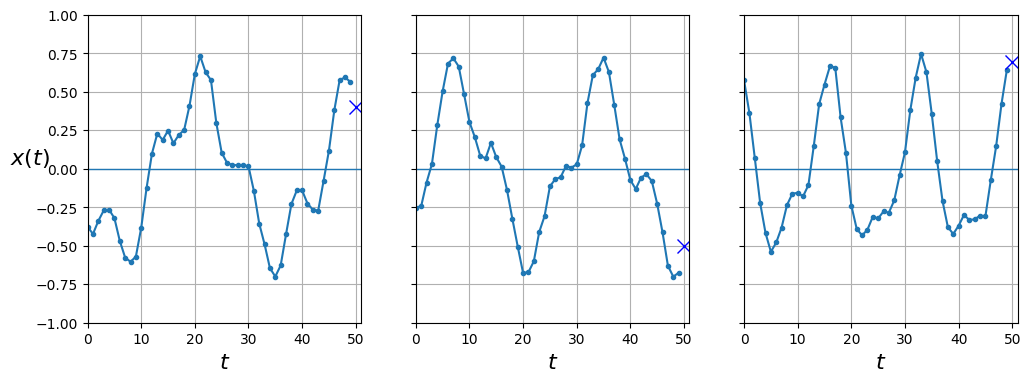

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()

##### Computing Some Baselines
Naive predictions (just predict the last observed value):


In [ ]:
from keras.losses import mean_squared_error
y_pred = X_valid[:, -1]
np.mean(mean_squared_error(y_valid, y_pred))

np.float32(0.47568396)

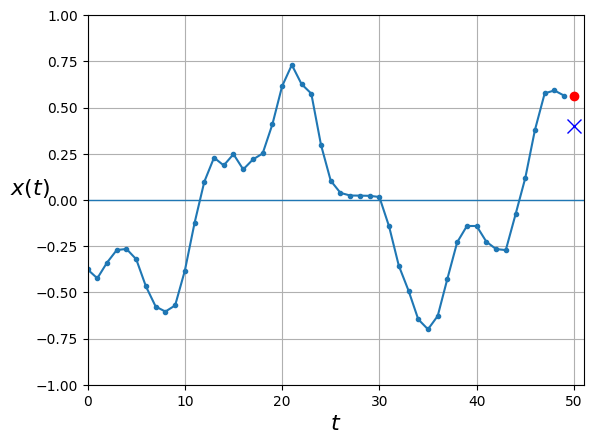

In [ ]:
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

**Linear Model**


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0599 - val_loss: 0.0161
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0136 - val_loss: 0.0108
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033


0.0034782858565449715

##### Making function for plotting learning curves and plotting the same

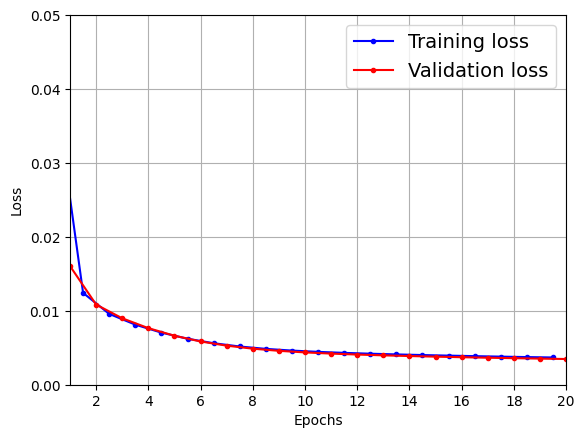

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


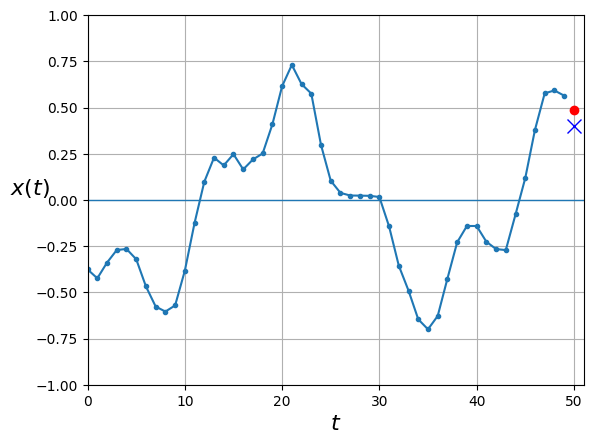

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()



**Single Layered Simple RNN Model**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0178 - val_loss: 0.0109
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110


0.010956737212836742

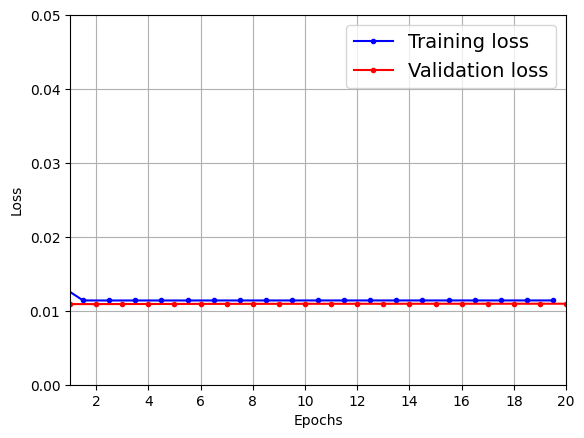

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


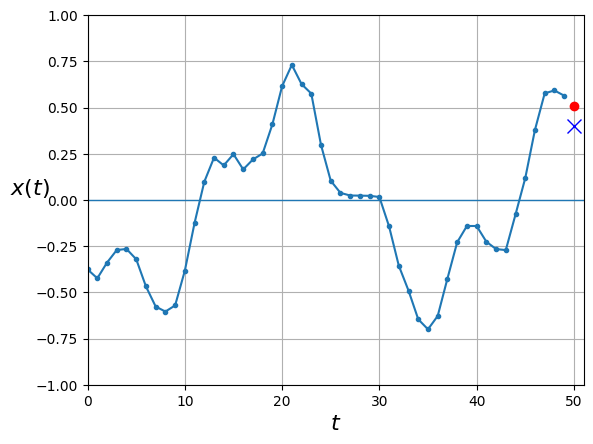

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

**Deep RNN Model with Multiple Simple RNN Layers**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0500 - val_loss: 0.0059
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0052 - val_loss: 0.0038
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027


0.002838804153725505

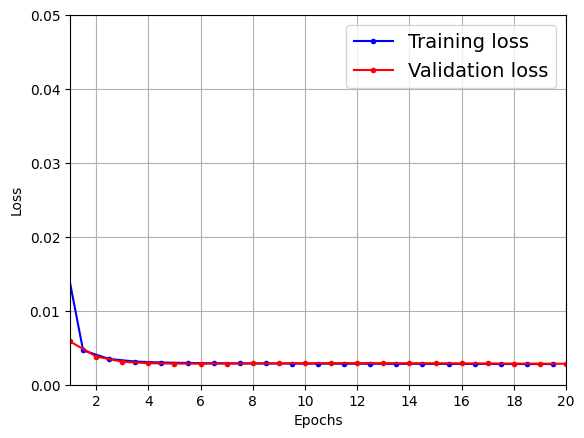

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


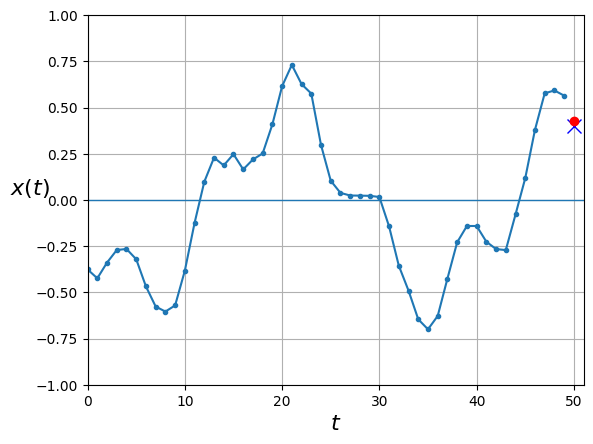

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Make the second SimpleRNN layer return only the last output:

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0355 - val_loss: 0.0062
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0053 - val_loss: 0.0037
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

In [ ]:
model.evaluate(X_valid, y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0026


0.0026639781426638365

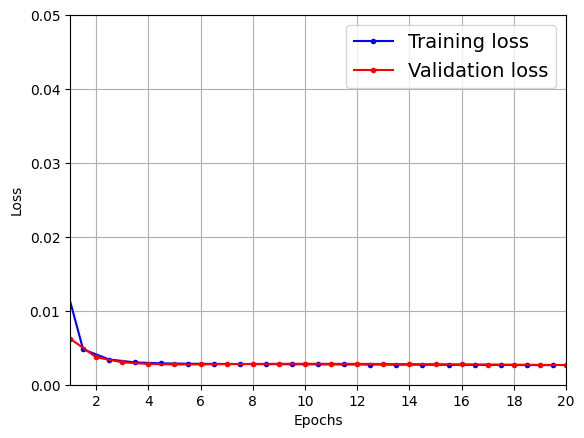

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


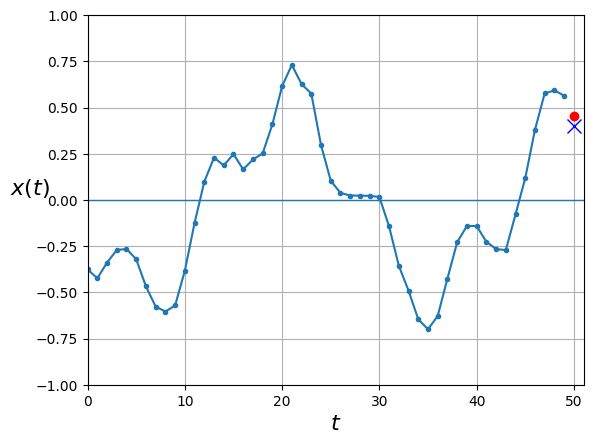

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

##### Using Same above **Model for Forecasting Several Steps** Ahead

To predict the next 10 values,  use the model we already trained, make it predict the next value, then add that value to the inputs (acting as if this predicted value had occurred), and use the model again to predict the following value, and so on, as in the following code.


In [ ]:
np.random.seed(43) # not 42, as it would give the first series in the train set

series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [ ]:
Y_pred.shape

(1, 10, 1)

In [ ]:
X_new.shape

(1, 50, 1)

In [ ]:
X.shape

(1, 60, 1)

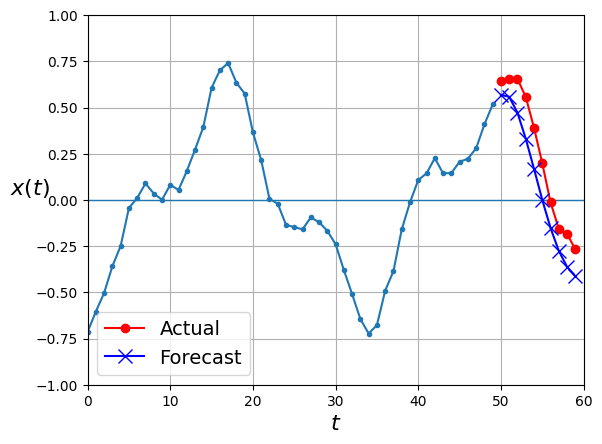

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

##### Now let's use this model to predict the next 10 values. We first need to regenerate the sequences with 9 more time steps.

In [ ]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

##### Now let's predict the next 10 values one by one:

In [ ]:
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:, 0]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
Y_pred.shape

(2000, 10)

In [ ]:
from keras.metrics import mean_squared_error
np.mean(mean_squared_error(Y_valid, Y_pred))

np.float32(0.030882657)

#### Now let's create an RNN that predicts all 10 next values at once
The second way for predicting multiple time-step ahead is to train an RNN to predict all 10 next values at once. We can still use a sequence-to-vector model, but it will output 10 values instead of 1. However, we first need to change the targets to be vectors containing the next 10 values:


In [ ]:
np.random.seed(42)
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.1236 - val_loss: 0.0309
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0287 - val_loss: 0.0187
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0175 - val_loss: 0.0141
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0142 - val_loss: 0.0122
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0126 - val_loss: 0.0111
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0116 - val_loss: 0.0105
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0111 - val_loss: 0.0100
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0097 - val_loss: 0.0090
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step


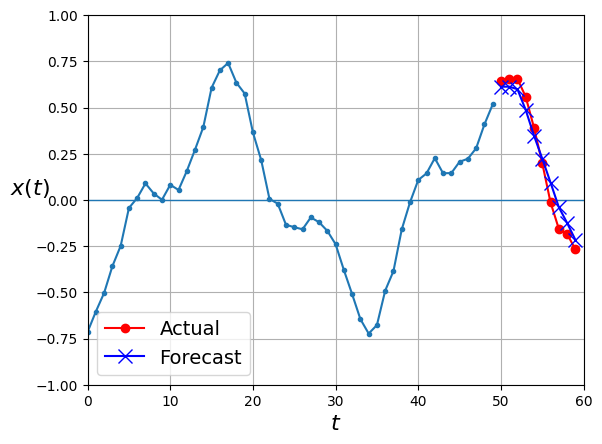

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

**Model with time Distributed layer**

Now let's create an RNN that predicts the next 10 steps at each time step. That is, instead of just forecasting time steps 50 to 59 based on time steps 0 to 49, it will forecast time steps 1 to 10 at time step 0, then time steps 2 to 11 at time step 1, and so on, and finally it will forecast time steps 50 to 59 at the last time step.

We have to turn this sequence-to-vector RNN into a sequence-to-sequence RNN by setting return_sequences=True in all recurrent layers (even the last one), and we must apply the output Dense layer at every time step. Keras offers a TimeDistributed layer for this very purpose: it wraps any layer (e.g., a Dense layer) and applies it at every time step of its input sequence. It does this efficiently, by reshaping the inputs so that each time step is treated as a separate instance (i.e., it reshapes the inputs from [batch size, time steps, input dimensions] to [batch size × time steps, input dimensions]; in this example, the number of input dimensions is 20 because the previous SimpleRNN layer has 20 units), then it runs the Dense layer, and finally it reshapes the outputs back to sequences (i.e., it reshapes the outputs from [batch size × time steps, output dimensions] to [batch size, time steps, output dimensions]; in this example the number of output dimensions is 10, since the Dense layer has 10 units)


In [ ]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [ ]:
X_train.shape, Y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - last_time_step_mse: 0.0681 - loss: 0.0766 - val_last_time_step_mse: 0.0224 - val_loss: 0.0369
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - last_time_step_mse: 0.0244 - loss: 0.0377 - val_last_time_step_mse: 0.0195 - val_loss: 0.0330
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - last_time_step_mse: 0.0196 - loss: 0.0329 - val_last_time_step_mse: 0.0151 - val_loss: 0.0293
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - last_time_step_mse: 0.0169 - loss: 0.0302 - val_last_time_step_mse: 0.0153 - val_loss: 0.0284
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - last_time_step_mse: 0.0156 - loss: 0.0284 - val_last_time_step_mse: 0.0133 - val_loss: 0.0266
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - last_time_step_mse: 0.0147 - loss: 0.0270 - val_last_time_step_mse: 0.0136 - val_loss: 0.0260
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - last_time_step_mse: 0.0131 - loss: 0.0257 - val_last_ti

<font color='blue'>**Discussion 2:** Why is the `TimeDistributed()` layer used in the above code cell? </font>

In [ ]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


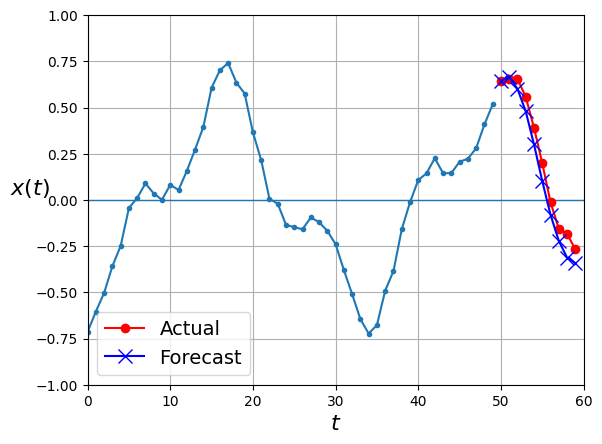

In [ ]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

### Vanishing/exploding gradient
* The vanishing and exploding gradient phenomena are often encountered in the context of RNNs. The reason why they happen is that it is difficult to capture long term dependencies because of multiplicative gradient that can be exponentially decreasing/increasing with respect to the number of layers

### Gradient clipping
* It is a technique used to cope with the exploding gradient problem sometimes encountered when performing backpropagation. By capping the maximum value for the gradient, this phenomenon is controlled in practice.

### GRU/LSTM


*  Gated Recurrent Unit (GRU) and Long Short-Term Memory units (LSTM) deal with the vanishing gradient problem encountered by traditional RNNs and able to remember a piece of information and keep it saved for many timesteps.


### Long Short-Term Memory units (LSTM Cell)

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/LSTM_Cell.PNG)

$\text{Figure:  LSTM-Cell }$

### Understanding Gates and States

**Forget gate** (Controlled by $f_{(t)}$) controls which parts of the long-term state should be erased.

**Input gate** (controlled by :  $i_{(t)}$) controls which parts of a  $g_{(t)}$ should be added to the long term cell state  $c_{(t)}$.

**Output gate** (controlled by $o_{(t)}$) controls which parts of the long term cell state should be read and output at this time step, both to prediction $y_{(t)}$  and $h_{(t)}$.

**Long term Cell state**  $c_{(t)}$ is the "memory" that gets passed onto future time steps.

 **Short term Cell state** $h_{(t)}$

* The Short term state gets passed to the LSTM cell's next time step.
* It is used to determine the three gates (Controlled by $f_{(t)}$, $i_{(t)}$, $o_{(t)}$) of the next time step.
* It is also used for the prediction $y_{(t)}$.





**Note:** Similar to the basic RNN example, we  can implement the LSTM cell from scratch for a single time-step. After that it can be called from inside a "for-loop" to have a forward pass for multiple time step as required by the problem.


#### [An example with dataset where  LSTM is implemented using Keras.](https://drive.google.com/file/d/12CSiMKzxvSOtvzOshWkasnHtJCJQAm-y/view?usp=share_link)



### Gated Recurrent Unit (GRU)
The GRU is the newer generation of Recurrent Neural networks and is pretty similar to an LSTM. Both state vectors are merged into a single vector $h_{(t)}$. It also  has only two gates, a forget gate and input gate, see the figure below.

![Img](https://cdn.iisc.talentsprint.com/CDS/Images/GRU_Cell.PNG)

$\text{Figure: GRU-Cell}$

Both state vectors are merged into a single vector $h_{(t)}$
- A single gate controller $z_{(t)}$ controls both the forget gate and the input gate. If the gate controller outputs a 1, the forget gate is open (= 1) and the input gate is closed (1 – 1 = 0). If it outputs a 0, the opposite happens. In other words, whenever a memory must be stored, the location where it will be stored is erased first. This is actually a frequent variant to the LSTM cell in and of itself.
-There is no output gate; the full state vector is output at every time step. However, there is a new gate controller $r_{(t)}$ that controls which part of the previous state will be shown to the main layer ($g_{(t)}$).

#### [An example with dataset where  GRU is implemented using Keras.](https://drive.google.com/file/d/1KMJE2ikvyqgIhdEUMmSio9PE4U98Hxw_/view?usp=share_link)

<font color='blue'>**Discussion 3:** After seeing the GRU example, discuss what a Dropout vs a RecurrentDropout? </font>

#### References
`1.` Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow
by Aurélien Géron, Second edition, O’ Reilly Media Publication.


### Theory Questions

1. What is Sequence-to-Sequence RNN?

 In Sequence to Sequence Learning, RNN is trained to map an input sequence to an output sequence which is not necessarily of the same length.
Applications are speech recognition, machine translation, image captioning and question answering.
The Encoder RNN reads the input sequence and generates the ﬁxed-size context vector which represents a semantic summary of the input sequence.

 The fixed-size context vector is given as input to the decoder RNN.
The fixed-size context can be provided as the initial state of the Decoder RNN, or it can be connected to the hidden units at each time step. These two ways can also be combined.
The number of time steps in the Encoder and Decoder need not to be equal.

2. Compare between CNN and RNN ?


  CNN                                           |  RNN
------------------------------------------------|--------------------------
It is suitable for spatial data such as images. | RNN is suitable for temporal data, also called sequential data.
CNN is considered to be more powerful than RNN. | RNN includes less feature compatibility when compared to CNN.
This network takes fixed size inputs and generates fixed size outputs.   | RNN can handle arbitrary input/output lengths.
CNN is a type of feed-forward artificial neural network with variations of multilayer perceptrons designed to use minimal amounts of preprocessing. | RNN unlike feed forward neural networks - can use their internal memory to process arbitrary sequences of inputs.
CNNs are ideal for images and video processing.	| RNNs are ideal for text and speech analysis.

                  


3. Suppose you have a daily univariate time series, and you want to forecast it for upcoming days. Which RNN architecture should you use?

 The answer is given by using a real life based example.

 Given the rise of smart electricity meters and the wide adoption of electricity generation technology like solar panels, there is a wealth of electricity usage data available.

 This data represents a multivariate time series of power-related variables that in turn could be used to model and even forecast future electricity consumption.

 Unlike other machine learning algorithms, long short-term memory (LSTM) recurrent neural networks are capable of automatically learning features from sequence data, support multiple-variate data, and can output a variable length sequences that can be used for multi-step forecasting.